# Textual Analysis 

## Fitting to TF-IDF and CV

In [1]:
#Importing all tidied data
import pandas as pd
snips = pd.read_csv('tnc_tidyClean.csv')
snips.snippet = snips.snippet.astype('U') #Need to convert entire col to unicode to prevent errors

#Subsetting df by wkNum
df_subs = []
for i in range(min(snips.wkNum), max(snips.wkNum) + 1): df_subs.append(snips[snips.wkNum == i])

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF

n_components = 10 #Using 10 topics for sake of demonstration
n_top_words = 10 #Selecting the top 10 words per topic

We may wish to drop some weeks of observation if they contibute little to the data... the first couple weeks of 2020 had extremely sparse coronavirus mass awareness

In [3]:
[len(df.snippet) for df in df_subs]

[88, 183, 668, 7767, 10620, 8122, 8228, 7636, 16544, 23727, 8674]

In [4]:
#Dropping weeks with under 2000 snippets
df_subs = df_subs[3:]

In [5]:
#Testing to see the change was made
[len(df.snippet) for df in df_subs]

[7767, 10620, 8122, 8228, 7636, 16544, 23727, 8674]

In [6]:
for df in df_subs: df = df.reset_index(drop = True)

In [7]:
for i, df in enumerate(df_subs): df.to_csv('snips_%d' %i + '.csv', encoding = 'utf-8', index = False, header = True)

Back to vectorizing...

In [8]:
#Setting a default function for setting the vectorizer
def set_vec(model = TfidfVectorizer,
                  max_df = .95,
                  min_df = 2,
                  max_features = 2000, # keep top 2000 terms 
                  ngram_range = (2, 3),
                  stop_words = 'english'): 
    
    return model(max_df = max_df,
                min_df = min_df,
                max_features = max_features,
                ngram_range = ngram_range,
                stop_words = stop_words)


#Have both CV and TF-IDF for comparison
vec1 = set_vec()
vec2 = set_vec(CountVectorizer)

In [8]:
tfidf_transforms = []
cv_transforms = []

tfidf_vocab = [] #List of lists of vocab for all 3 months
cv_vocab = []
#Filling these lists with feature matrices and associated vocabularies
for sub in df_subs:
    tfidf_transforms.append(vec1.fit_transform(sub.snippet))
    tfidf_vocab.append(vec1.get_feature_names())
    
    cv_transforms.append(vec2.fit_transform(sub.snippet))
    cv_vocab.append(vec2.get_feature_names())
    
#This cell takes some time to run...

In [9]:
#Printing one of the vocab lists to show that vocab was extracted
display(cv_vocab[0])

['ability spread',
 'able spread',
 'absolutely effect',
 'accelerates backdrop',
 'accelerates backdrop cities',
 'accelerating asia',
 'accelerating country',
 'accelerating country faces',
 'accelerating spread',
 'accelerating spread new',
 'acting slowly',
 'acting slowly sars',
 'action try',
 'action try stop',
 'acute respiratory',
 'acute respiratory syndrome',
 'addition deaths',
 'addition deaths new',
 'adrian brown',
 'advised people',
 'advised people traveling',
 'affected spill',
 'affecting people',
 'afraid infect',
 'afternoon live',
 'ago chinese',
 'ago hong',
 'ago hong kong',
 'ago sars',
 'ago sars crisis',
 'ahead lunar',
 'ahead lunar new',
 'ahead new',
 'ahead new year',
 'airport man',
 'airport man suspected',
 'airports prepared',
 'airports prepared diagnose',
 'airports train',
 'airports train stations',
 'airports world',
 'alert chair',
 'alert chair border',
 'alert china',
 'allowed home',
 'america war',
 'america war terror',
 'amid concerns',
 '

## Preparation

In [9]:
def get_topics(X, terms, n_top_words): #Returns topics as list of lists of terms
    for i, comp in enumerate(X):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key = lambda x: x[1], reverse = True)[:n_top_words]
        top_terms = [t[0] for t in sorted_terms]
        
    print(top_terms)

## Fitting to SVD

In [10]:
#Re-importing in case we can start from back here
from sklearn.decomposition import TruncatedSVD

In [12]:
# SVD represent documents and terms in vectors

#Getting topics and topic weights from both TF-IDF and CV doc groupings
tfidf_svd_transforms = []
tfidf_svd_weights = []
for trans in tfidf_transforms:
    #Reset SVD for every new transformation.
    svd = TruncatedSVD(n_components = n_components)
    tfidf_svd_transforms.append(svd.fit_transform(trans))
    tfidf_svd_weights.append(svd.components_)

cv_svd_transforms = []
cv_svd_weights = []
for trans in cv_transforms:
    svd = TruncatedSVD(n_components = n_components)
    cv_svd_transforms.append(svd.fit_transform(trans))
    cv_svd_weights.append(svd.components_)

In [13]:
#Show that the corpus text from both vecs were grouped under SVD
print('TF-IDF\n')

for i, trans in enumerate(tfidf_transforms):
    get_topics(tfidf_svd_weights[i], tfidf_vocab[i], n_top_words)
    print('\n')
    
print('\nCV\n')

for i, trans in enumerate(cv_transforms):
    get_topics(cv_svd_weights[i], cv_vocab[i], n_top_words)
    print('\n')

TF-IDF

['health officials', 'confirmed cases', 'people died', 'officials say', 'person person', 'china health', 'health officials say', 'china health officials', 'cases confirmed', 'south korea']


['little bit', 'global growth', 'lot people', 'new york', 'killed people', 'incubation period', 'global health', 'global health emergency', 'people china', 'mainland china']


['confirmed cases', 'tested positive', 'public health', 'people tested', 'people tested positive', 'day day', 'cases china', 'health officials', 'hong kong', 'confirmed cases china']


['united states', 'number cases', 'president trump', 'health officials', 'economic impact', 'going break', 'years ago', 'outside china', 'supply chain', 'public health']


['confirmed cases', 'diamond princess', 'number cases', 'number confirmed', 'number confirmed cases', 'death toll', 'people infected', 'board diamond', 'board diamond princess', 'mainland china']


['health care', 'make sure', 'donald trump', 'number cases', 'care wor

## Fitting to NMF

In [11]:
#Re-importing in case we can start from back here
from sklearn.decomposition import NMF

In [15]:
#Moving through same procedure with NMF as with SVD

tfidf_nmf_transforms = []
tfidf_nmf_weights = []

cv_nmf_transforms = []
cv_nmf_weights = []

for trans in tfidf_transforms:
    nmf = NMF(n_components = n_components, random_state = 123) #Keep random state constant for result consistency.
    tfidf_nmf_transforms.append(nmf.fit_transform(trans))
    tfidf_nmf_weights.append(nmf.components_)

for trans in cv_transforms:
    nmf = NMF(n_components = n_components, random_state = 123)
    cv_nmf_transforms.append(nmf.fit_transform(trans))
    cv_nmf_weights.append(nmf.components_)

In [16]:
#Show that the corpus text from both vecs were grouped under nmf
print('TF-IDF\n')

for i, trans in enumerate(tfidf_transforms):
    get_topics(tfidf_nmf_weights[i], tfidf_vocab[i], n_top_words)
    print('\n')
    
print('\nCV\n')

for i, trans in enumerate(cv_transforms):
    get_topics(cv_nmf_weights[i], cv_vocab[i], n_top_words)
    print('\n')

TF-IDF

['health officials', 'confirmed cases', 'people died', 'officials say', 'person person', 'china health', 'south korea', 'cases confirmed', 'health officials say', 'chinese city']


['little bit', 'lot people', 'global growth', 'new york', 'outside china', 'new cases', 'like sars', 'really going', 'china really', 'countries outside']


['people died', 'mainland china', 'outside mainland', 'outside mainland china', 'china people', 'died china', 'number people', 'people died china', 'people infected', 'number cases']


['united states', 'going break', 'health officials', 'years ago', 'public health', 'economic impact', 'states world', 'united states world', 'impact china', 'showing symptoms']


['confirmed cases', 'number confirmed', 'number confirmed cases', 'death toll', 'people died', 'number cases', 'mainland china', 'cases confirmed', 'cases china', 'economic impact']


['new york', 'health care', 'new york city', 'york city', 'confirmed cases', 'york times', 'new york times'

In [12]:
import numpy as np

In [13]:
# get topics with their terms and weights
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    sorted_indices = np.array([list(row[::-1]) for row in np.argsort(np.abs(weights))])
    sorted_weights = np.array([list(wt[index]) for wt, index in zip(weights, sorted_indices)])
    sorted_terms = np.array([list(feature_names[row]) for row in sorted_indices])

    topics = [np.vstack((terms.T, term_weights.T)).T for terms, term_weights in zip(sorted_terms, sorted_weights)]

    return topics

# prints components of all the topics obtained from topic modeling
def print_topics_udf(topics,
                     total_topics = 5,
                     num_terms = 10,
                     weight_threshold = 0.0001,
                     display_weights = True):

    for index in range(total_topics):
        topic = topics[index]
        
        topic = [(term, float(wt))
                 for term, wt in topic]
        
        topic = [(word, round(wt,2))
                 for word, wt in topic
                 if abs(wt) >= weight_threshold]

        if display_weights:
            print('Topic # %d' % (index + 1) + ' with weights')
            print(topic[:num_terms]) if num_terms else topic
        else:
            print('Topic # %d' % (index + 1) + ' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms]) if num_terms else tw
            
        print('\n')

# prints components of all the topics obtained from topic modeling
def get_topics_udf(topics, total_topics = 5,
                     weight_threshold = 0.0001,
                     num_terms = 10):

    topic_terms = []

    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt))
                 for term, wt in topic]
        topic = [(word, round(wt,2))
                 for word, wt in topic
                 if abs(wt) >= weight_threshold]

        topic_terms.append(topic[:num_terms] if num_terms else topic)

    return topic_terms

### Testing output with CV to NMF Workflow

In [26]:
topics_cv = []
for i, trans in enumerate(cv_nmf_transforms):
    topic_month = get_topics_terms_weights(cv_nmf_weights[i], cv_vocab[i])
    topics_cv.append(topic_month)

topics_display_list_cv = []
for i, trans in enumerate(cv_nmf_transforms):
    top_list = get_topics_udf(topics_cv[i], total_topics = 10, num_terms = 30)
    topics_display_list_cv.append(top_list)

In [27]:
for i, top in enumerate(topics_cv):
    print('Week #%d' %(i+4) + ' of 2020\n')
    print_topics_udf(topics_cv[i], total_topics = 10, num_terms = 10)

Week #4 of 2020

Topic # 1 with weights
[('new year', 4.25), ('lunar new', 3.28), ('lunar new year', 3.25), ('year holiday', 1.1), ('new year holiday', 1.09), ('millions people', 0.61), ('year celebrations', 0.46), ('new year celebrations', 0.46), ('chinese new', 0.41), ('chinese new year', 0.4)]


Topic # 2 with weights
[('world health', 3.45), ('health organization', 3.28), ('world health organization', 3.2), ('health emergency', 1.27), ('public health', 0.77), ('global health', 0.63), ('public health emergency', 0.59), ('global health emergency', 0.57), ('organization says', 0.43), ('health organization says', 0.43)]


Topic # 3 with weights
[('public health', 1.14), ('begun screening', 0.96), ('international airports', 0.96), ('public health risk', 0.95), ('health risk', 0.95), ('prepared diagnose appears', 0.95), ('international airports prepared', 0.95), ('airports prepared', 0.95), ('diagnose appears', 0.95), ('airports prepared diagnose', 0.95)]


Topic # 4 with weights
[('deat

Topic # 9 with weights
[('president jinping', 0.99), ('hong kong', 0.99), ('forced sign', 0.78), ('police forced sign', 0.77), ('police forced', 0.77), ('confession died friday', 0.76), ('confession died', 0.76), ('humiliating confession died', 0.76), ('humiliating confession', 0.76), ('died friday', 0.76)]


Topic # 10 with weights
[('cruise ship', 2.81), ('diamond princess', 0.78), ('tested positive', 0.74), ('hong kong', 0.64), ('confirmed cases', 0.52), ('quarantined cruise ship', 0.46), ('quarantined cruise', 0.46), ('ship japan', 0.45), ('cruise ship japan', 0.42), ('turned away', 0.4)]


Week #8 of 2020

Topic # 1 with weights
[('cruise ship', 4.81), ('ship japan', 1.7), ('cruise ship japan', 1.67), ('quarantined cruise', 1.09), ('quarantined cruise ship', 1.09), ('hundreds passengers', 0.49), ('ship hit', 0.37), ('cruise ship hit', 0.36), ('japan died', 0.32), ('leave cruise ship', 0.31)]


Topic # 2 with weights
[('ukraine case', 1.09), ('case disease', 1.07), ('important ukra

Topic # 3 with weights
[('stay home', 2.98), ('public gatherings', 1.77), ('emergency measures', 0.9), ('justify travel', 0.8), ('justify travel government', 0.8), ('travel government extends', 0.8), ('travel government', 0.8), ('government extends', 0.8), ('told stay', 0.78), ('measures nationwide', 0.77)]


Topic # 4 with weights
[('white house', 2.93), ('task force', 1.7), ('president trump', 1.52), ('vice president', 1.3), ('house task', 0.69), ('house task force', 0.69), ('white house task', 0.67), ('mike pence', 0.43), ('president mike', 0.41), ('president mike pence', 0.41)]


Topic # 5 with weights
[('new york', 6.99), ('united states', 3.93), ('york city', 1.22), ('new york city', 1.22), ('number cases', 0.9), ('york times', 0.84), ('new york times', 0.84), ('york governor', 0.75), ('new york governor', 0.75), ('york state', 0.62)]


Topic # 6 with weights
[('south korea', 1.11), ('public gatherings', 1.09), ('france germany', 0.87), ('shock therapy', 0.87), ('therapy measures

### Testing output with TF-IDF to NMF Workflow

In [28]:
topics_tfidf = []
for i, trans in enumerate(tfidf_nmf_transforms):
    topic_month = get_topics_terms_weights(tfidf_nmf_weights[i], tfidf_vocab[i])
    topics_tfidf.append(topic_month)

topics_display_list_tfidf = []
for i, trans in enumerate(tfidf_nmf_transforms):
    top_list = get_topics_udf(topics_tfidf[i], total_topics = 10, num_terms = 30)
    topics_display_list_tfidf.append(top_list)

In [29]:
for i, top in enumerate(topics_tfidf):
    print('Week #%d' %(i+4) + ' of 2020\n')
    print_topics_udf(topics_tfidf[i], total_topics = 10, num_terms = 10)

Week #4 of 2020

Topic # 1 with weights
[('new year', 2.14), ('lunar new', 1.67), ('lunar new year', 1.64), ('year holiday', 0.52), ('new year holiday', 0.52), ('chinese new', 0.29), ('chinese new year', 0.29), ('ahead lunar', 0.28), ('ahead lunar new', 0.28), ('travel lunar new', 0.27)]


Topic # 2 with weights
[('world health', 1.73), ('health organization', 1.68), ('world health organization', 1.66), ('health emergency', 0.3), ('global health', 0.26), ('emergency meeting', 0.21), ('global health emergency', 0.21), ('organization says', 0.19), ('health organization says', 0.19), ('global emergency', 0.18)]


Topic # 3 with weights
[('hong kong', 2.8), ('cases hong', 0.14), ('cases hong kong', 0.14), ('incubation period', 0.13), ('confirmed case', 0.11), ('kong people', 0.11), ('hong kong people', 0.11), ('suspected cases', 0.11), ('hong kong authorities', 0.11), ('kong authorities', 0.11)]


Topic # 4 with weights
[('human human', 2.34), ('human transmission', 1.55), ('human human tr

Topic # 5 with weights
[('public health', 3.05), ('health officials', 0.18), ('public health officials', 0.15), ('health england', 0.14), ('public health england', 0.14), ('open borders', 0.12), ('health crisis', 0.11), ('health emergency', 0.1), ('public health emergency', 0.1), ('travel restrictions', 0.08)]


Topic # 6 with weights
[('white house', 2.98), ('vice president', 0.29), ('stock market', 0.27), ('task force', 0.21), ('news conference', 0.17), ('make sure', 0.17), ('health officials', 0.16), ('capitol hill', 0.14), ('mike pence', 0.13), ('coming white', 0.13)]


Topic # 7 with weights
[('tested positive', 3.06), ('people tested', 0.22), ('people tested positive', 0.2), ('number cases', 0.16), ('confirmed cases', 0.14), ('hotel tenerife', 0.14), ('staying tested', 0.12), ('italian doctor', 0.12), ('cruise ship', 0.11), ('health minister', 0.11)]


Topic # 8 with weights
[('hong kong', 3.05), ('mainland china', 0.1), ('hong kong university', 0.09), ('kong university', 0.09), 

Here we have the most pertinent topics for each of the observed weeks in 2020. These topics (especially the top ones) corellate closely with topics in the news media around that time. Chinese New Year occured around late January/early February, and is highly publicized every year. Shortly after, topics involving the WHO and coronavirus cases spreading to Hong Kong and other countries begin to take precedence.

## LDA Model

## Adapted from https://shravan-kuchkula.github.io/topic-modeling

In [14]:
#Building LDA Model using sklearn
from sklearn.decomposition import LatentDirichletAllocation

The way our data will be organized later is more coherent when dealing with unigrams, so for our purposes we will be running through this pipeline again and observing individual words.

Due to best practices regarding data pipelines into LDA, we will be proceeding with CV-fitted documents.

#### Fitting Data to CV with Unigrams then Piping into LDA

In [15]:
cv_transforms2 = []
cv_vocab2 = []

cv_unis = set_vec(CountVectorizer, ngram_range = (1, 1))

for sub in df_subs:
    cv_transforms2.append(cv_unis.fit_transform(sub.snippet))
    cv_vocab2.append(cv_unis.get_feature_names())

In [16]:
#THIS CELL TAKES A LONG TIME!!

cv_lda_transforms = []
for i, trans in enumerate(cv_transforms2):
    lda_model = LatentDirichletAllocation(n_components = n_components, learning_method = 'online',
                                         random_state = 123) #Keep random state consistent
    lda_output = lda_model.fit_transform(cv_transforms2[i])
    cv_lda_transforms.append(lda_output)

In [17]:
#Seeing what the new transformed matrices look like
display(cv_lda_transforms[0])
display(cv_lda_transforms[0].shape)

#Given best practices, CV is more fitting for use in sending data into LDA

array([[0.00555559, 0.08638557, 0.77822337, ..., 0.09649822, 0.00555594,
        0.00555698],
       [0.00666669, 0.19869054, 0.00666836, ..., 0.00666788, 0.49709415,
        0.00666788],
       [0.00588238, 0.00588305, 0.59165746, ..., 0.36128199, 0.00588247,
        0.00588236],
       ...,
       [0.16621787, 0.01111111, 0.01111142, ..., 0.01111111, 0.01111111,
        0.01111777],
       [0.08104458, 0.00666692, 0.00666889, ..., 0.43713378, 0.0066668 ,
        0.07445426],
       [0.11035504, 0.00909142, 0.25453745, ..., 0.14380927, 0.00909115,
        0.22225029]])

(7767, 10)

### Some Preliminary Functions

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

def get_counts(count_data,
               vectorizer = CountVectorizer(stop_words = 'english'),
               n_top_words = n_top_words):
    words = vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n_top_words]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    
    return {words[w]:counts[w] for w, wd in enumerate(words)}

# Helper function to plot the most common words in a corpus, given certain constraints.
def plot_most_common_words(count_data,
                             vectorizer = CountVectorizer(stop_words = 'english'),
                             n_top_words = n_top_words):
    words = vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n_top_words]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180)) #Golden ratio
    plt.subplot(title='%d' %n_top_words + ' most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [19]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

def get_topics(model = lda_model, count_vectorizer = cv_unis, n_top_words = n_top_words):
    words = count_vectorizer.get_feature_names()
    topic_list = []
    for topic in model.components_:
        topic_list.append([words[i]
                          for i in topic.argsort()[:-n_top_words - 1:-1]])
    return topic_list
 
# Helper function
def print_topics(model = lda_model, count_vectorizer = cv_unis, n_top_words = n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

### Testing LDA Model

In [20]:
#Columns
topicnames = ['Topic %d' %i for i in range(n_components)]

#Indices
docnames = []
for df in df_subs: docnames.append(['Doc %d' %i for i, doc in enumerate(df.snippet)])

#Dataframes for viz
document_topic_dfs = []
for i, trans in enumerate(cv_lda_transforms):
    document_topic_dfs.append(pd.DataFrame(np.round(cv_lda_transforms[i], 2), columns = topicnames, index = docnames[i]))

#Testing
document_topic_dfs[0].head(10)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Doc 0,0.01,0.09,0.78,0.01,0.01,0.01,0.01,0.10,0.01,0.01
Doc 1,0.01,0.20,0.01,0.26,0.01,0.01,0.01,0.01,0.50,0.01
Doc 2,0.01,0.01,0.59,0.01,0.01,0.01,0.01,0.36,0.01,0.01
Doc 3,0.01,0.10,0.85,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Doc 4,0.00,0.00,0.33,0.00,0.37,0.00,0.00,0.10,0.18,0.00
Doc 5,0.01,0.01,0.01,0.63,0.01,0.01,0.01,0.01,0.01,0.29
Doc 6,0.01,0.17,0.01,0.40,0.01,0.01,0.01,0.37,0.01,0.01
Doc 7,0.01,0.01,0.01,0.21,0.01,0.16,0.24,0.32,0.01,0.01
Doc 8,0.01,0.01,0.01,0.37,0.01,0.01,0.01,0.01,0.01,0.56
Doc 9,0.00,0.89,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00


In [21]:
keyword_dfs = []
for i, df in enumerate(document_topic_dfs):
    # Topic - Keyword matrix
    df_topic_keywords = pd.DataFrame(lda_model.components_)

    # assign column and index
    df_topic_keywords.columns = cv_vocab2[i]
    df_topic_keywords.index = topicnames
    
    keyword_dfs.append(df_topic_keywords)

# check the head
keyword_dfs[0].iloc[:, :10]

,ability,able,abroad,absolutely,abuse,accelerates,accelerating,access,according,achieve
Topic 0,0.100020,0.100006,0.100000,0.100005,0.100011,14.755568,0.100008,0.100005,0.100032,0.100025
Topic 1,0.100031,0.100023,0.100004,0.100006,0.100035,0.100021,0.100001,0.100025,0.100032,0.100027
Topic 2,37.997518,0.100014,0.100009,0.100007,0.100021,0.100007,0.100004,0.100027,0.100017,0.100026
Topic 3,0.100013,0.100010,0.100004,0.100008,0.100025,0.100009,16.972460,0.100009,24.712990,0.100009
Topic 4,0.100018,0.100026,0.100002,0.100007,53.036749,0.100028,0.100014,10.235970,0.100029,0.100013
Topic 5,0.100014,0.100018,1.807385,0.100024,0.100044,0.100034,0.100004,21.609302,0.100028,0.100024
Topic 6,0.100012,0.100027,0.100001,13.796162,0.100021,0.100028,0.100007,0.100025,0.100023,14.028579
Topic 7,0.100014,0.100013,0.100002,0.100008,0.100015,0.100011,0.100000,0.100012,0.100019,0.100029
Topic 8,0.100015,130.099879,10.762165,0.100019,0.100018,0.100031,0.100003,0.100033,7.072406,0.100012
Topic 9,0.100016,0.100015,0.100008,0.100008,0.100012,0.100041,0.100051,0.100014,18.013464,0.100021


We can get an idea of what topics reflect the public mindset in some way by finding the dominant topics and then taking a number of keywords from each topic. This way, we can figure out which topics are leading and then the primary subject matter of those topics.

In [22]:
#Run this cell only once for accurate results; otherwise, reset document_topic_dfs.

for df in document_topic_dfs: df['dominant_topic'] = np.argmax(df.values, axis=1)

In [23]:
document_topic_dfs[0].head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,dominant_topic
Doc 0,0.01,0.09,0.78,0.01,0.01,0.01,0.01,0.10,0.01,0.01,2
Doc 1,0.01,0.20,0.01,0.26,0.01,0.01,0.01,0.01,0.50,0.01,8
Doc 2,0.01,0.01,0.59,0.01,0.01,0.01,0.01,0.36,0.01,0.01,2
Doc 3,0.01,0.10,0.85,0.01,0.01,0.01,0.01,0.01,0.01,0.01,2
Doc 4,0.00,0.00,0.33,0.00,0.37,0.00,0.00,0.10,0.18,0.00,4


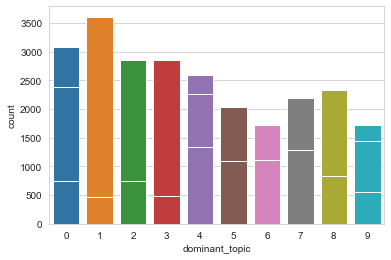

In [24]:
#Countplot across the entire corpus we're observing
import seaborn as sns
dominant_topic_plots = []
for df in document_topic_dfs: dominant_topic_plots.append(sns.countplot(df.dominant_topic))

Topic 1 is the dominant topic across the entire corpus, though Topics 0, 2, and 3 aren't far behind. If we give some meaning to these topics, that can indicate where to look for sentiments perpetrated by spoken news.

### Top 15 Keywords from each Topic

In [25]:
# Show top n keywords for each topic
def show_topics(vectorizer=cv_unis, lda_model=lda_model, n_words=n_top_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [26]:
topic_keywords = show_topics(n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word ' + str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic ' + str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,italy,country,number,cases,restrictions,news,outbreak,lockdown,deaths,reported,measures,new,death,europe,people
Topic 1,china,positive,tested,said,days,working,hands,south,hospitals,korea,end,taken,health,bring,person
Topic 2,response,health,house,outbreak,white,force,government,federal,meeting,live,task,community,span,washington,talking
Topic 3,cases,people,died,china,weeks,confirmed,number,italy,germany,affected,told,schools,far,quarantine,infected
Topic 4,president,trump,know,stay,people,home,going,contact,right,cdc,says,make,prime,need,important
Topic 5,new,today,state,tested,york,people,say,positive,day,outbreak,said,thank,testing,want,american
Topic 6,think,know,look,really,time,work,spread,going,people,lot,come,home,way,seen,country
Topic 7,oil,markets,impact,economy,global,economic,market,prices,fears,price,world,russia,war,demand,day
Topic 8,people,public,spread,health,crisis,like,government,gatherings,flu,ship,measures,able,stop,california,know
Topic 9,states,world,united,travel,countries,health,things,morning,good,coming,think,seeing,going,pandemic,entire


Based on the corpus topic countplot, it would seem the dominant topic is about China and its role in the outbreak and subsequent response to the coronavirus.

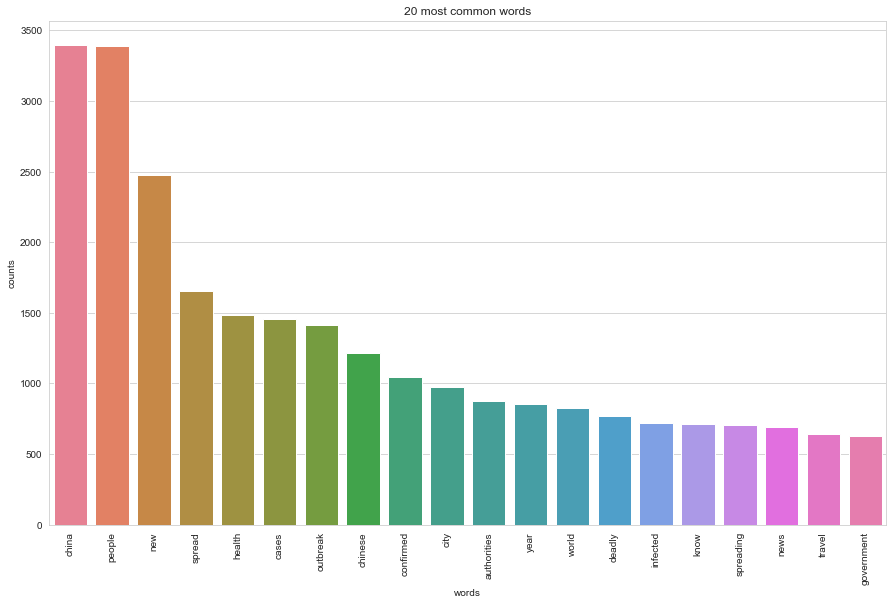

In [27]:
# Initialise the count vectorizer with the English stop words
#count_vectorizer = cv_unis
cv = cv_unis
# Fit and transform the processed titles
cv_data = cv_unis.fit_transform(df_subs[0].snippet)
#lda_data = lda_model.fit_transform(cv_data)
#Visualise the 20 most common words
#Using unigrams for broader topic research
plot_most_common_words(cv_data, cv, 20)

"China" was the top unigram in spoken news about the coronavirus for several weeks. It is also the top word in the most dominant topic across the entire corpus. This opens up an interesting avenue of investigation where we can analyze the general sentiment of China during our time period of investigation using sentiment analysis.

## How do we Feel about all This: Sentiment Analysis of LDA Data

### Adapted from our HW3 & HW4 Code

In [28]:
IA = pd.read_excel('inquireraugmented.xls')

In [29]:
pos_list = list(IA['Entry'][2:][(IA['Positiv'].notnull())]) #Indexed to ignore header and proceeding blank line.
neg_list = list(IA['Entry'][2:][(IA['Negativ'].notnull())])

In [30]:
#Assuming weights of 1 for all words.
def sentiment_scorer(text_input, sentiment_list):
    text_wds = text_input.upper().split() #upper() to match words in P & N
    
    sentiment_score = 0.
    
    for word in text_wds:
        if word in sentiment_list: sentiment_score += 1.
            
    sentiment_score = sentiment_score / len(text_wds)
    
    return sentiment_score

In [31]:
def pos_score(text_input):
    if isinstance(text_input, str):
        if len(text_input.split()) > 0: score = sentiment_scorer(text_input, pos_list)
        else: score = 0.
    else: score = 0.
    
    return score

def neg_score(text_input):
    if isinstance(text_input, str):
        if len(text_input.split()) > 0: score = sentiment_scorer(text_input, neg_list)
        else: score = 0.
    else: score = 0.
    
    return score

In [ ]:
#This cell takes a long time!!

#Apply the positive and negative score function to the dfs.
for df in df_subs:
    df['positive_sentiment'] = df.snippet.apply(pos_score)
    df['negative_sentiment'] = df.snippet.apply(neg_score)

In [34]:
#Saving dfs with new columns
for i, df in enumerate(df_subs): df.to_csv('snips_%d' %i + '.csv', encoding = 'utf-8', index = False, header = True)

In [6]:
#Checkpoint if starting back here
import pandas as pd
df_subs = []
for i in range(8): df_subs.append(pd.read_csv('snips_%d' %i+ '.csv'))

In [7]:
for df in df_subs: 
    df['net_sentiment'] = df.positive_sentiment - df.negative_sentiment
    df['china_count'] = df.snippet.str.count('china')

### See Sentiment around China as Weeks Pass

In [15]:
#Merging df_subs into snips dataframe with new cols.
snips = df_subs[0].append(df_subs[1:])

In [19]:
snips['china_present'] = snips['china_count'] == 1

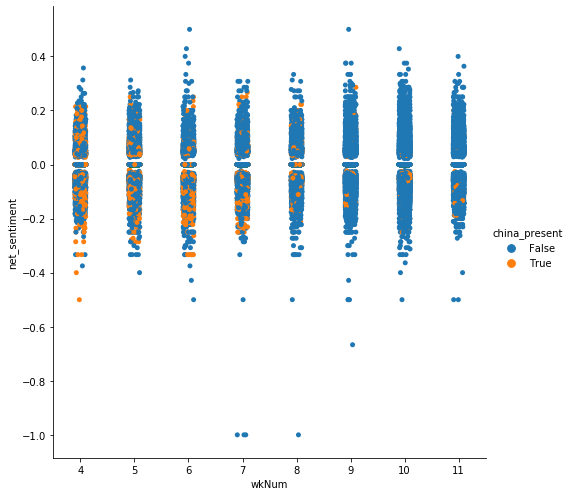

In [20]:
import seaborn as sns
ax = sns.catplot(x="wkNum", y="net_sentiment",
                  hue = "china_present", data=snips,
                height = 7)

Judging by this catplot, it doesn't seem that whether China is mentioned has a significant effect on the snippet's net sentiment. However, the results of the subsequent OLS regression tell a different tale...

In [21]:
import statsmodels.formula.api as sm

In [22]:
result = sm.ols(formula="net_sentiment ~ china_count", data=snips).fit()

In [23]:
print(result.params)

Intercept     -0.001452
china_count   -0.011775
dtype: float64


In [24]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          net_sentiment   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     674.2
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          4.19e-148
Time:                        10:49:12   Log-Likelihood:             1.2046e+05
No. Observations:               91311   AIC:                        -2.409e+05
Df Residuals:                   91309   BIC:                        -2.409e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0015      0.000     -6.184      

Given the p-value of effectively 0, we reject the implicit null hypothesis of there being no relationship between the number of times "china" appears in a snippet and the snippet's net sentiment. There is enough evidence here to suggest that there is a significant relationship between these two variables.

In [27]:
sentiment_with_china = []
sentiment_no_china = []
for df in df_subs:
    for i, cnt in enumerate(df.china_count):
        if cnt == 1: sentiment_with_china.append(df.net_sentiment[i])
        else: sentiment_no_china.append(df.net_sentiment[i])

In [28]:
import numpy as np

def Z_stat(sample1, sample2, D = 0):
    x_bar = np.mean(sample1)
    y_bar = np.mean(sample2)
    
    denom = np.sqrt( np.std(sample1)**2 / len(sample1) + np.std(sample2)**2 / len(sample2) )

    Z = (x_bar - y_bar - D) / denom
    return Z

In [29]:
if Z_stat(sentiment_no_china, sentiment_with_china) > 2.326: print('Z_stat > Z_alpha, therefore we reject H_0 with 99% confidence')
else: print('Z_stat = %f' % Z_stat(sentiment_with_china, sentiment_no_china) + ' <= Z_alpha, therefore we fail to reject H_0 with 99% confidence.')

Z_stat > Z_alpha, therefore we reject H_0 with 99% confidence


The Z-test confirms our suspicion that there is evidence suggesting that the mean sentiment of snippets without the word "china" is higher than those with "china" appearing once.